Trying to get NLCD images to project correctly.

In [43]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import numpy as np
from matplotlib import pyplot as plt

In [2]:
temp = rasterio.open('./gee-temperatures/Richmond-2000.tif')

In [10]:
tree = rasterio.open('./nlcd-tree/Richmond.tif')

In [63]:
temp.bounds

BoundingBox(left=-77.54221599908345, bottom=37.500980019325134, right=-77.38294469920906, top=37.59799807001004)

In [57]:
temp.shape

(360, 591)

In [24]:
tree.transform

Affine(30.0, 0.0, 1604115.0,
       0.0, -30.0, 1776735.0)

In [46]:
temp.meta

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': 0.0,
 'width': 591,
 'height': 360,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.00026949458523585647, 0.0, -77.54221599908345,
        0.0, -0.00026949458523585647, 37.59799807001004)}

In [55]:
output = np.zeros(temp.shape)
kwargs = tree.meta.copy()
kwargs.update(temp.meta)
with rasterio.open('test.tif', 'w', **kwargs) as dst:
    reproject(
        source=rasterio.band(tree, 1),
        destination=rasterio.band(dst, 1),
        src_transform=tree.transform,
        src_crs=tree.crs,
        dst_transform=temp.transform,
        dst_crs=temp.crs,
        dst_resolution=(temp.width, temp.height)
    )

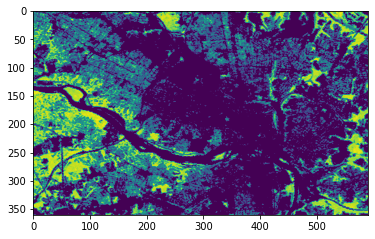

In [45]:
plt.imshow(output, cmap='viridis')